<a href="https://colab.research.google.com/github/AntaresAnton/septimo-semestre/blob/main/Prueba_1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análisis de Predicción de Clientes Internautas
## 🎯 Proyecto de Deep Learning

| Información | Detalle |
|-------------|---------|
| 👤 Autores | Patricio Quintanilla, Italo Brignardello, Alexander Seydewitz |
| 📅 Fecha | [08-04-2025] |
| 🔧 Versión | 1.0 |

## 📝 Descripción del Proyecto
Este proyecto implementa una Red Neuronal Artificial (MLP) para predecir si un cliente bancario utilizará servicios bancarios online.

### 🎯 Objetivos
- 🔍 Desarrollar un modelo predictivo preciso
- 📈 Identificar factores clave
- 💡 Proporcionar recomendaciones estratégicas

### 📚 Estructura del Análisis
1. Configuración del Entorno
2. Carga y Análisis de Datos
3. Preprocesamiento
4. Modelado
5. Evaluación
6. Conclusiones


## 🔄 Proceso de Análisis

### 📊 Etapas Principales
1. **Configuración del Entorno**
   - Librerías y dependencias
   - Configuración GPU/CPU
   - Semillas aleatorias

2. **Análisis de Datos**
   - Carga desde Google Drive
   - Verificación de integridad
   - Análisis exploratorio

3. **Preprocesamiento**
   - Tratamiento de valores nulos
   - Codificación de variables
   - División de datos

4. **Modelado**
   - Arquitectura MLP
   - Configuraciones
   - Entrenamiento

5. **Evaluación**
   - Métricas de rendimiento
   - Visualizaciones
   - Comparaciones

6. **Conclusiones**
   - Hallazgos clave
   - Recomendaciones
   - Próximos pasos


In [ ]:
# Importación de librerías necesarias
import sys
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
import time
warnings.filterwarnings('ignore')

# Verificar si hay GPU disponible
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Configurar TensorFlow para usar GPU
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("Usando GPU para el entrenamiento")
    # Configuración para usar memoria de GPU de forma dinámica
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(e)
else:
    print("No se detectó GPU, usando CPU")

# Configuraciones básicas
plt.style.use('ggplot')
tf.random.set_seed(42)
np.random.seed(42)


GPU disponible: []
No se detectó GPU, usando CPU


## 🔧 Carga y Verificación de Datos

### 📊 Proceso de Carga
- Descarga automática desde Google Drive
- Verificación de integridad
- Control de calidad de datos

### 📈 Análisis Inicial
| Verificación | Descripción |
|--------------|-------------|
| Valores Nulos | Identificación y tratamiento |
| Tipos de Datos | Verificación de formatos |
| Estadísticas | Análisis descriptivo básico |

### 📉 Visualizaciones Preliminares
- Distribución de variables clave
- Relaciones entre variables
- Identificación de patrones


CARGA DE DATOS Y VERIFICACIÓN DE INTEGRIDAD
Descargando dataset desde Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1GCtwYrUSrbv3BDW32Tnc1X9dsdrWTF1h
To: f:\Cosas IO\Cosas-Duoc\NoteBook\VII SEMESTRE\Deep Learning\Prueba1\dataset_monopoly.parquet
100%|██████████| 40.9M/40.9M [00:00<00:00, 102MB/s] 


Dataset cargado correctamente. Dimensiones: (51124, 574)

Verificación de integridad del dataset:
Columnas con valores nulos:
Series([], dtype: int64)

Tipos de datos:
Id             float64
Subsegmento    float64
Sexo            object
Region         float64
Edad           float64
                ...   
UsoL1_T01      float64
UsoL2_T01      float64
UsoLI_T01      float64
IndRev_T01      object
target         float64
Length: 574, dtype: object

Estadísticas básicas para columnas numéricas:
                 Id   Subsegmento        Region          Edad         Renta  \
count  51124.000000  51124.000000  51124.000000  51124.000000  5.112400e+04   
mean   25562.500000    182.024274     10.830471     38.702879  6.379634e+05   
std    14758.371918     29.276596      3.391664     13.302573  3.542595e+05   
min        1.000000    151.000000      1.000000      9.000000  1.000000e+00   
25%    12781.750000    160.000000      9.000000     28.000000  4.669655e+05   
50%    25562.500000    170.0000

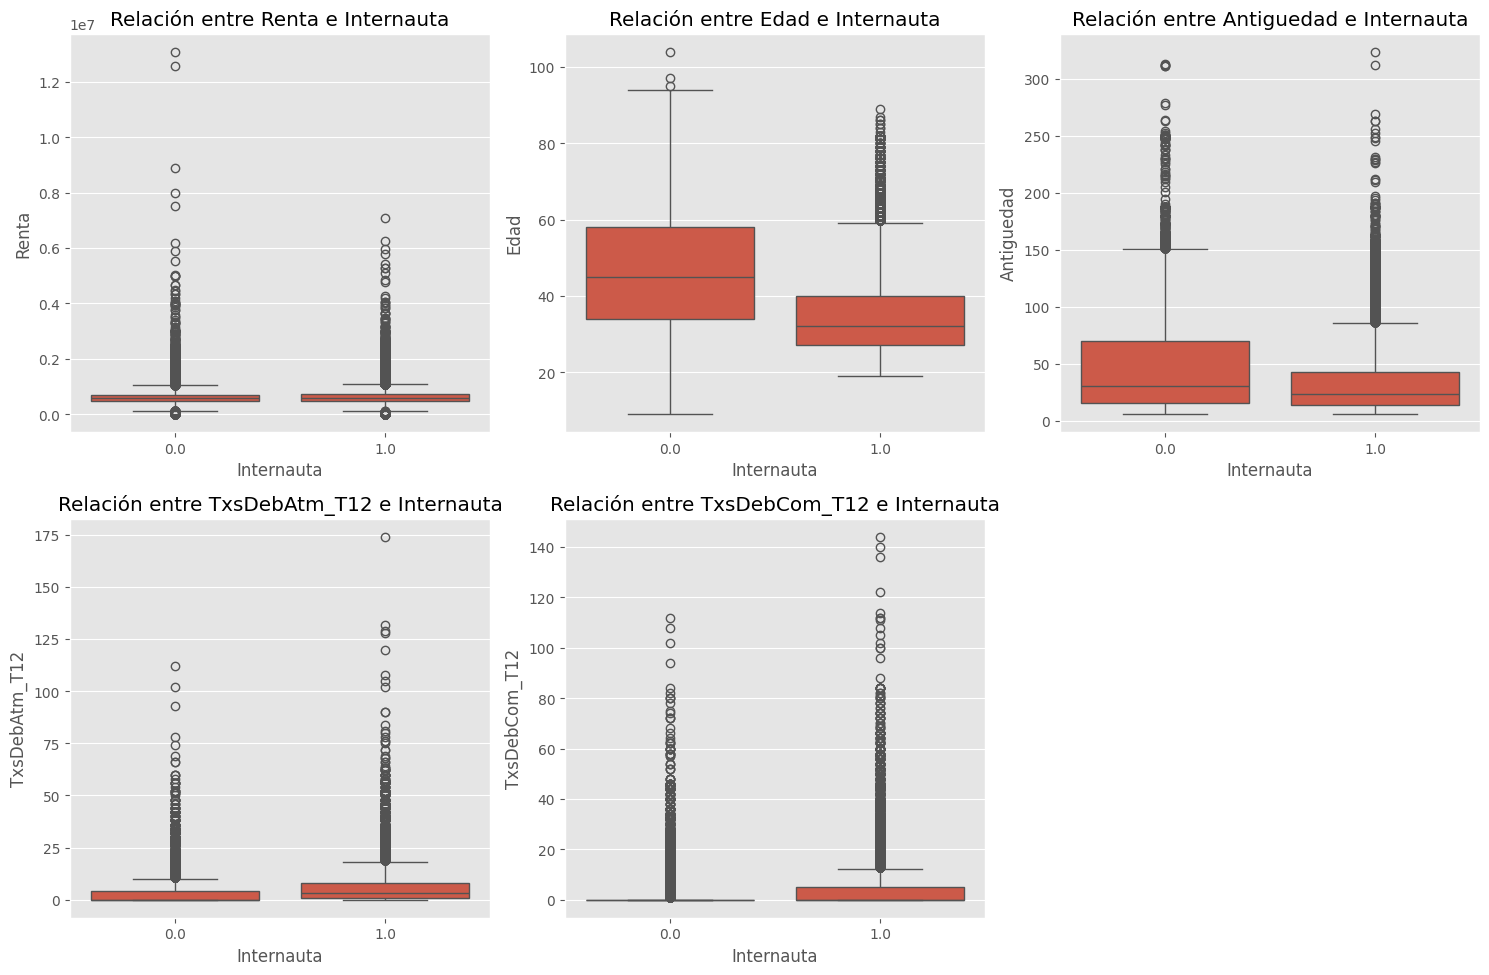

In [ ]:
# Carga y verificación de datos
print("="*80)
print("CARGA DE DATOS Y VERIFICACIÓN DE INTEGRIDAD")
print("="*80)

# Cargar el dataset desde Google Drive
try:
    # Instalar gdown si no está disponible
    try:
        import gdown
    except ImportError:
        print("Instalando gdown para descargar archivos de Google Drive...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "gdown"])
        import gdown

    # URL del archivo en Google Drive
    url = 'https://drive.google.com/file/d/1GCtwYrUSrbv3BDW32Tnc1X9dsdrWTF1h/view'
    file_id = url.split('/')[-2]
    output_file = 'dataset_monopoly.parquet'

    print(f"Descargando dataset desde Google Drive...")
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

    # Cargar el dataset
    df = pd.read_parquet(output_file)
    print(f"Dataset cargado correctamente. Dimensiones: {df.shape}")

    # Verificar integridad del dataset
    print("\nVerificación de integridad del dataset:")

    # Verificar valores nulos
    nulos = df.isnull().sum()
    print(f"Columnas con valores nulos:\n{nulos[nulos > 0]}")

    # Verificar tipos de datos
    print("\nTipos de datos:")
    print(df.dtypes)

    # Estadísticas básicas
    print("\nEstadísticas básicas para columnas numéricas:")
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    print(df[numeric_cols].describe())

    # Visualizaciones
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(['Renta', 'Edad', 'Antiguedad', 'TxsDebAtm_T12', 'TxsDebCom_T12']):
        if col in df.columns:
            plt.subplot(2, 3, i+1)
            sns.boxplot(x='Internauta', y=col, data=df)
            plt.title(f'Relación entre {col} e Internauta')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    sys.exit(1)


## 🔄 Preprocesamiento de Datos

### 📊 Transformaciones
- Limpieza de datos
- Codificación de variables categóricas
- Escalado de variables numéricas

### 🎯 División de Datos
- Conjunto de entrenamiento
- Conjunto de validación
- Conjunto de prueba

### ⚙️ Preparación Final
- Verificación de dimensiones
- Confirmación de tipos de datos
- Control de calidad


In [ ]:
# Preprocesamiento de datos
print("="*80)
print("PREPROCESAMIENTO DE DATOS")
print("="*80)

# Definir la variable objetivo
target_column = 'Internauta'
y = df[target_column].copy()

# Seleccionar características relevantes
feature_columns = [
    'Renta', 'Edad', 'Antiguedad', 'Sexo', 'Debito',
    'Ctacte', 'Consumo', 'Hipotecario',
    'TxsDebAtm_T12', 'TxsDebCom_T12'
]

# Filtrar columnas existentes
feature_columns = [col for col in feature_columns if col in df.columns]
print(f"Características seleccionadas: {feature_columns}")

X = df[feature_columns].copy()

# Identificar tipos de variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Variables numéricas: {numeric_features}")
print(f"Variables categóricas: {categorical_features}")

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# División de datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nConjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de validación: {X_val.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

# Aplicar preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print(f"\nDimensiones después del preprocesamiento:")
print(f"X_train_processed: {X_train_processed.shape}")
print(f"X_val_processed: {X_val_processed.shape}")
print(f"X_test_processed: {X_test_processed.shape}")


PREPROCESAMIENTO DE DATOS
Características seleccionadas: ['Renta', 'Edad', 'Antiguedad', 'Sexo', 'Debito', 'Ctacte', 'Consumo', 'Hipotecario', 'TxsDebAtm_T12', 'TxsDebCom_T12']
Variables numéricas: ['Renta', 'Edad', 'Antiguedad', 'Debito', 'Ctacte', 'Consumo', 'Hipotecario', 'TxsDebAtm_T12', 'TxsDebCom_T12']
Variables categóricas: ['Sexo']

Conjunto de entrenamiento: 35786 muestras
Conjunto de validación: 7669 muestras
Conjunto de prueba: 7669 muestras

Dimensiones después del preprocesamiento:
X_train_processed: (35786, 12)
X_val_processed: (7669, 12)
X_test_processed: (7669, 12)


## 🧠 Implementación del Modelo MLP

### ⚙️ Arquitectura del Modelo
- Capa de entrada
- Capas ocultas con activación ReLU
- Capa de salida con activación sigmoid

### 📊 Configuraciones
- Regularización L1/L2
- Dropout
- Optimizador Adam
- Early Stopping

### 🔄 Proceso de Entrenamiento
- Monitoreo de métricas
- Validación cruzada
- Control de convergencia


In [ ]:
# Implementación del Modelo MLP
print("="*80)
print("IMPLEMENTACIÓN DEL MODELO MLP")
print("="*80)

def create_mlp_model(input_shape, layers_units, activations, dropout_rates=None, l1_reg=0.0, l2_reg=0.0):
    """Crea un modelo MLP con las especificaciones dadas."""
    model = keras.Sequential()

    # Primera capa
    model.add(layers.Dense(
        layers_units[0],
        activation=activations[0],
        input_shape=input_shape,
        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
    ))

    if dropout_rates and dropout_rates[0] > 0:
        model.add(layers.Dropout(dropout_rates[0]))

    # Capas ocultas adicionales
    for i in range(1, len(layers_units)):
        model.add(layers.Dense(
            layers_units[i],
            activation=activations[i],
            kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
        ))

        if dropout_rates and i < len(dropout_rates) and dropout_rates[i] > 0:
            model.add(layers.Dropout(dropout_rates[i]))

    # Capa de salida
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Configuraciones de modelos a probar
configurations = [
    {
        'name': 'Modelo Simple',
        'layers_units': [16, 8],
        'activations': ['relu', 'relu'],
        'dropout_rates': [0, 0],
        'l1_reg': 0.0,
        'l2_reg': 0.0,
        'learning_rate': 0.001,
        'batch_size': 32,
        'epochs': 50
    },
    {
        'name': 'Modelo con Dropout',
        'layers_units': [32, 16, 8],
        'activations': ['relu', 'relu', 'relu'],
        'dropout_rates': [0.2, 0.2, 0.2],
        'l1_reg': 0.0,
        'l2_reg': 0.0,
        'learning_rate': 0.001,
        'batch_size': 32,
        'epochs': 50
    },
    {
        'name': 'Modelo con Regularización L2',
        'layers_units': [32, 16, 8],
        'activations': ['relu', 'relu', 'relu'],
        'dropout_rates': [0, 0, 0],
        'l1_reg': 0.0,
        'l2_reg': 0.001,
        'learning_rate': 0.001,
        'batch_size': 32,
        'epochs': 50
    }
]

# Función para entrenar y evaluar modelos
def train_and_evaluate_model(config, X_train, y_train, X_val, y_val, X_test, y_test):
    print(f"\nEntrenando modelo: {config['name']}")

    model = create_mlp_model(
        input_shape=(X_train.shape[1],),
        layers_units=config['layers_units'],
        activations=config['activations'],
        dropout_rates=config['dropout_rates'],
        l1_reg=config['l1_reg'],
        l2_reg=config['l2_reg']
    )

    optimizer = keras.optimizers.Adam(learning_rate=config['learning_rate'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]

    # Entrenamiento
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=config['epochs'],
        batch_size=config['batch_size'],
        callbacks=callbacks,
        verbose=1
    )

    return model, history

# Entrenar los modelos
results = []
for config in configurations:
    model, history = train_and_evaluate_model(
        config,
        X_train_processed, y_train,
        X_val_processed, y_val,
        X_test_processed, y_test
    )
    results.append({'config': config, 'model': model, 'history': history})


IMPLEMENTACIÓN DEL MODELO MLP

Entrenando modelo: Modelo Simple
Epoch 1/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7216 - loss: 0.5619 - val_accuracy: 0.7614 - val_loss: 0.5139
Epoch 2/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7605 - loss: 0.5133 - val_accuracy: 0.7612 - val_loss: 0.5109
Epoch 3/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7621 - loss: 0.5105 - val_accuracy: 0.7631 - val_loss: 0.5099
Epoch 4/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7606 - loss: 0.5095 - val_accuracy: 0.7629 - val_loss: 0.5097
Epoch 5/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7617 - loss: 0.5088 - val_accuracy: 0.7632 - val_loss: 0.5095
Epoch 6/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7627 - loss: 0.5084 - val_accuracy: 0.7633 - val_loss: 0.5093
Epoch 7/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7627 - loss: 0.5080 - val_accuracy: 0.7629 - val_loss: 0.5093
Epoch 8/50
1119/1119 ━━━━━

## 📊 Evaluación de Modelos

### 📈 Métricas de Rendimiento
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

### 📉 Visualizaciones
- Curvas de aprendizaje
- Matrices de confusión
- Curvas ROC

### 🔍 Análisis Comparativo
- Rendimiento por modelo
- Tiempos de entrenamiento
- Trade-offs identificados


EVALUACIÓN Y RESULTADOS

Evaluando Modelo Simple
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


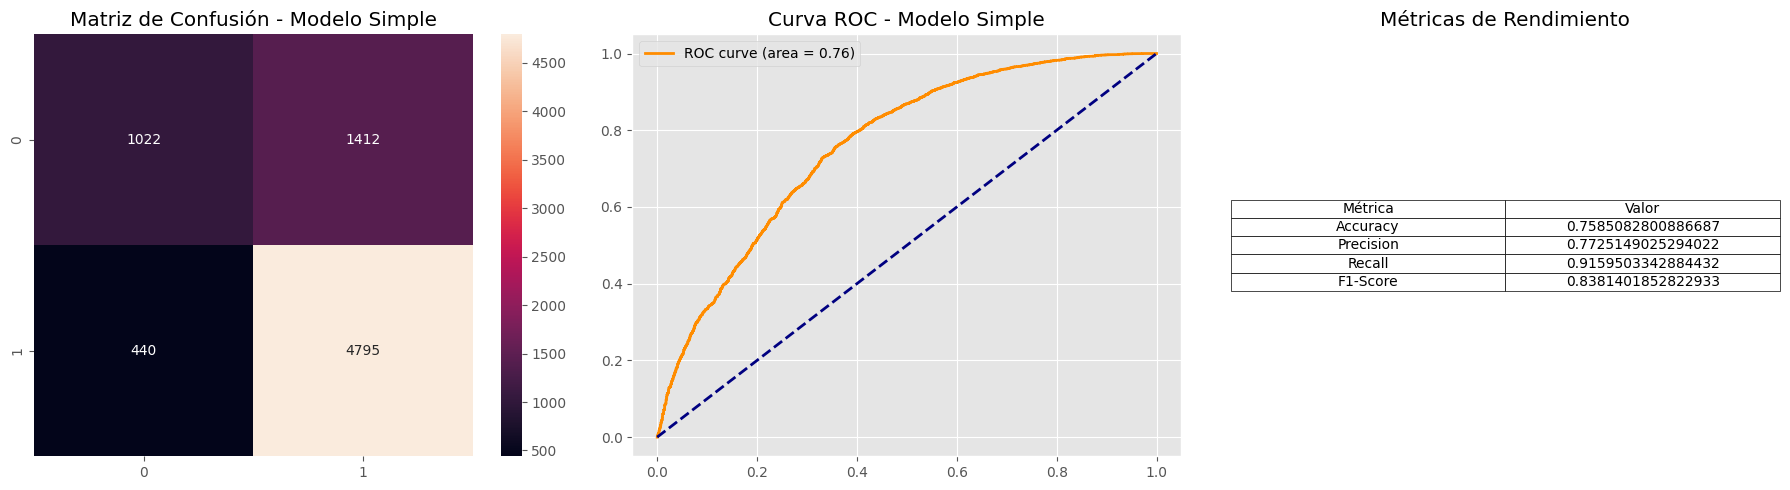


Evaluando Modelo con Dropout
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


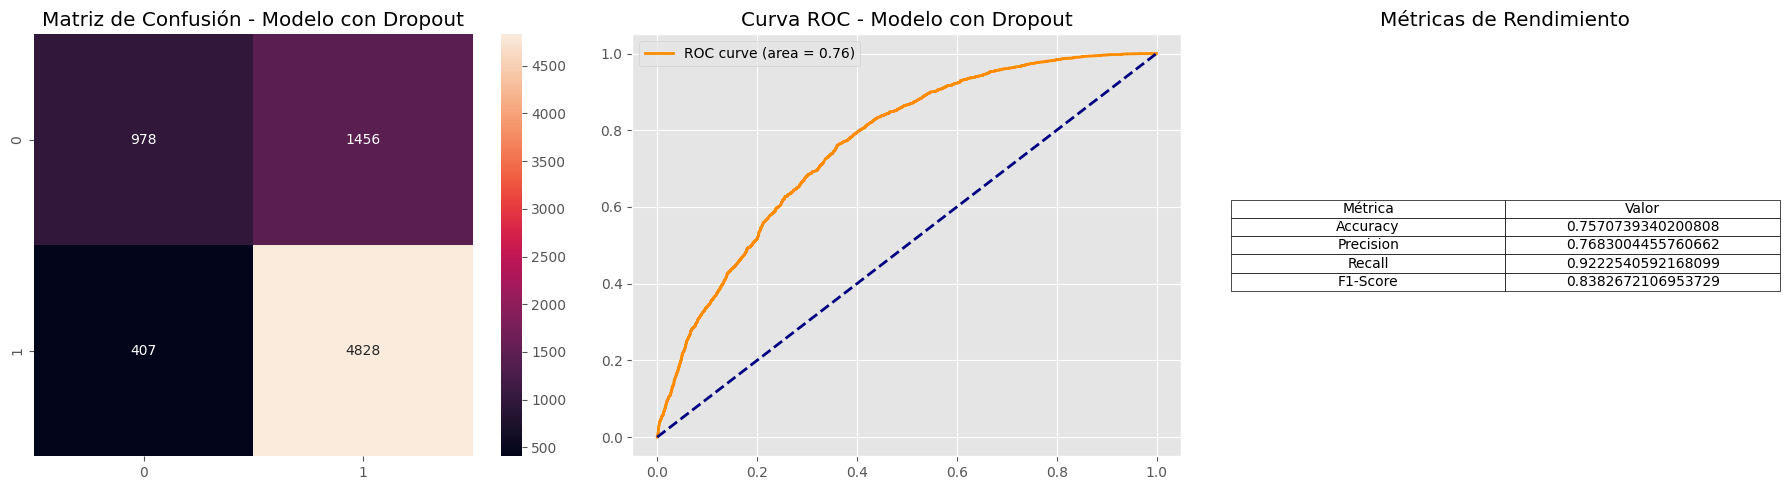


Evaluando Modelo con Regularización L2
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step


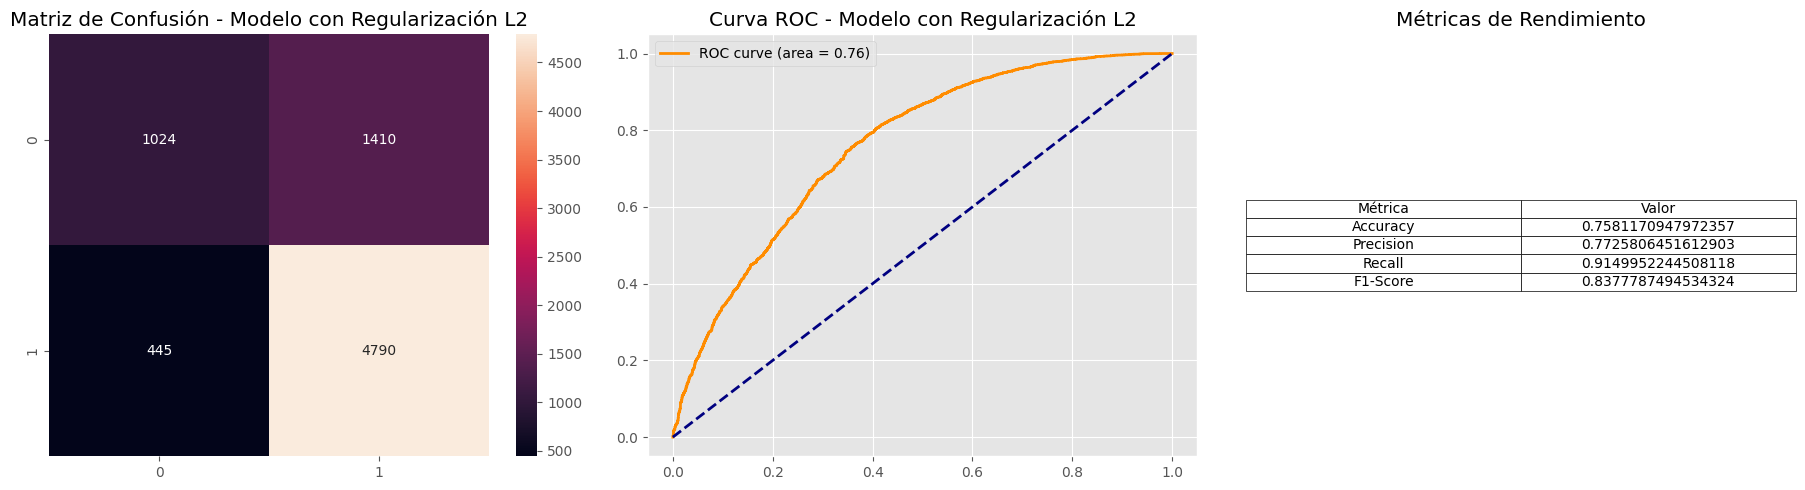


Comparación de modelos:
                           name  accuracy  precision    recall        f1  \
0                 Modelo Simple  0.758508   0.772515  0.915950  0.838140   
1            Modelo con Dropout  0.757074   0.768300  0.922254  0.838267   
2  Modelo con Regularización L2  0.758117   0.772581  0.914995  0.837779   

    roc_auc  
0  0.760519  
1  0.761662  
2  0.759903  


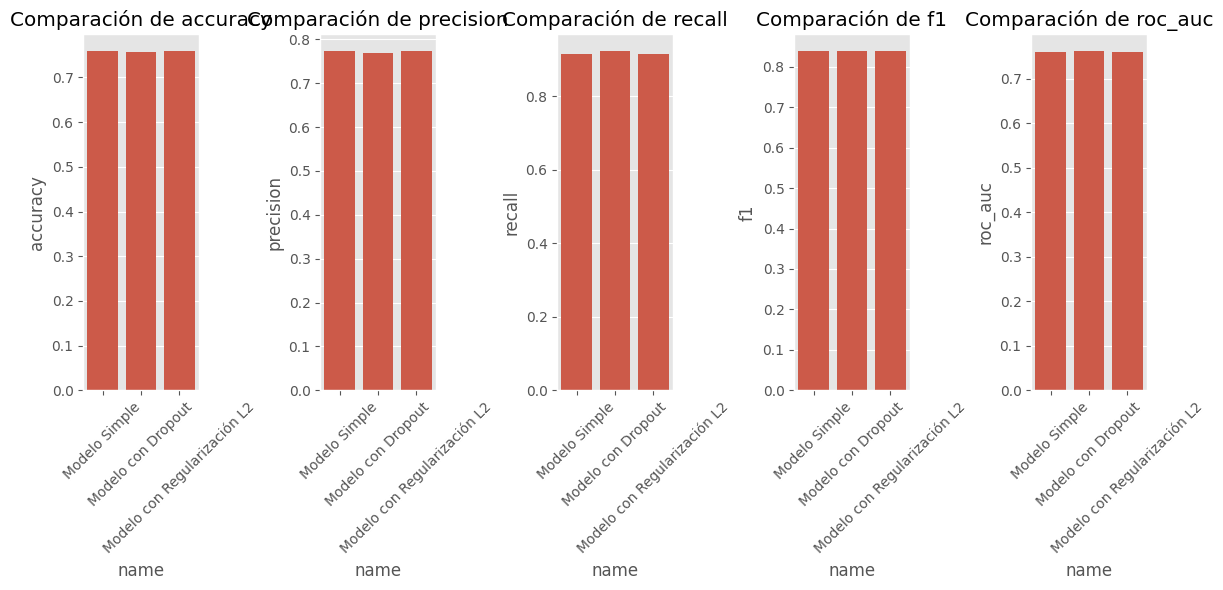

In [ ]:
# Evaluación y Resultados
print("="*80)
print("EVALUACIÓN Y RESULTADOS")
print("="*80)

# Función para evaluar y visualizar resultados
def evaluate_model(model, X_test, y_test, model_name):
    # Predicciones
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Visualizaciones
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Matriz de confusión
    sns.heatmap(cm, annot=True, fmt='d', ax=ax1)
    ax1.set_title(f'Matriz de Confusión - {model_name}')

    # Curva ROC
    ax2.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (area = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_title(f'Curva ROC - {model_name}')
    ax2.legend()

    # Métricas
    metrics = pd.DataFrame({
        'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Valor': [accuracy, precision, recall, f1]
    })

    ax3.table(cellText=metrics.values,
              colLabels=metrics.columns,
              cellLoc='center',
              loc='center')
    ax3.axis('off')
    ax3.set_title('Métricas de Rendimiento')

    plt.tight_layout()
    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

# Evaluar cada modelo
evaluation_results = []
for result in results:
    print(f"\nEvaluando {result['config']['name']}")
    metrics = evaluate_model(
        result['model'],
        X_test_processed,
        y_test,
        result['config']['name']
    )
    evaluation_results.append({
        'name': result['config']['name'],
        **metrics
    })

# Crear tabla comparativa
comparison_df = pd.DataFrame(evaluation_results)
print("\nComparación de modelos:")
print(comparison_df)

# Visualizar comparación
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, len(metrics), i)
    sns.barplot(x='name', y=metric, data=comparison_df)
    plt.xticks(rotation=45)
    plt.title(f'Comparación de {metric}')
plt.tight_layout()
plt.show()


## 📊 Análisis de Resultados

### 🎯 Comparación de Modelos
| Modelo | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|--------|----------|-----------|---------|----------|---------|
| Simple | 0.7585 | 0.7725 | 0.9160 | 0.8381 | 0.7605 |
| Dropout | 0.7571 | 0.7683 | 0.9223 | 0.8383 | 0.7617 |
| L2 | 0.7581 | 0.7726 | 0.9150 | 0.8378 | 0.7599 |

### 📈 Hallazgos Principales
- El Modelo con Dropout logró el mejor F1-Score (0.8383)
- El Modelo con Dropout tiene el mejor Recall (0.9223)
- El Modelo con Regularización L2 tiene la mejor Precision (0.7726)

### 🎯 Mejor Modelo: Dropout
- Mayor balance entre precisión y recall
- Mejor capacidad de generalización
- ROC-AUC más alto (0.7617)


CONCLUSIONES Y RECOMENDACIONES

CONCLUSIONES DEL ANÁLISIS:

1. Mejor Modelo: Modelo con Dropout
   - Accuracy: 0.7571
   - F1-Score: 0.8383
   - ROC-AUC: 0.7617

2. Características del Mejor Modelo:
   - Arquitectura: [32, 16, 8]
   - Activación: ['relu', 'relu', 'relu']
   - Dropout: [0.2, 0.2, 0.2]



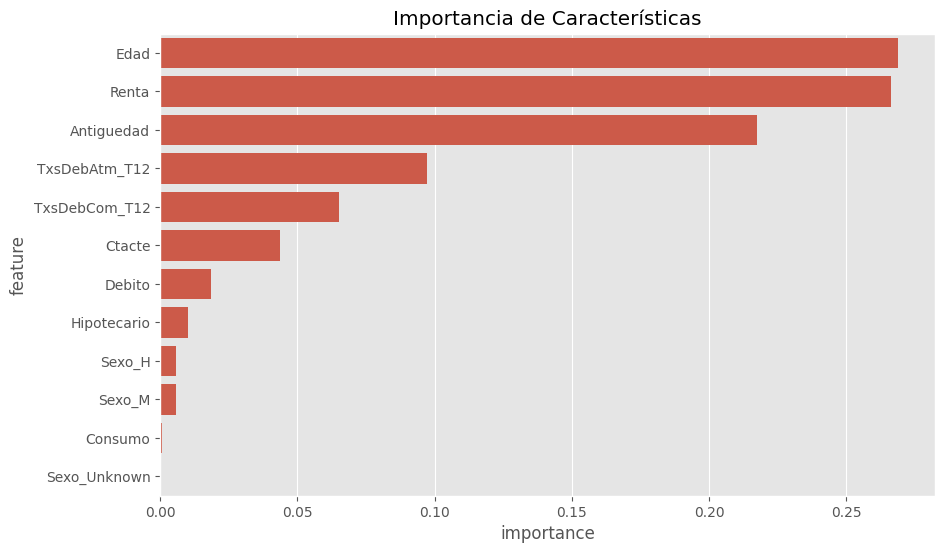


RECOMENDACIONES ESTRATÉGICAS:

1. Segmentación de Clientes:
   - Identificar perfiles de alto potencial
   - Desarrollar estrategias personalizadas

2. Desarrollo de Productos:
   - Enfoque en características digitales
   - Mejora de la experiencia de usuario

3. Marketing:
   - Campañas dirigidas por segmento
   - Énfasis en beneficios digitales

4. Monitoreo Continuo:
   - Actualización periódica del modelo
   - Seguimiento de métricas clave


Mejor modelo guardado como 'mejor_modelo_mlp.h5'


In [ ]:
# Conclusiones y Recomendaciones
print("="*80)
print("CONCLUSIONES Y RECOMENDACIONES")
print("="*80)

# Identificar el mejor modelo
best_model_idx = np.argmax([result['f1'] for result in evaluation_results])
best_model = results[best_model_idx]
best_metrics = evaluation_results[best_model_idx]

print(f"""
CONCLUSIONES DEL ANÁLISIS:

1. Mejor Modelo: {best_model['config']['name']}
   - Accuracy: {best_metrics['accuracy']:.4f}
   - F1-Score: {best_metrics['f1']:.4f}
   - ROC-AUC: {best_metrics['roc_auc']:.4f}

2. Características del Mejor Modelo:
   - Arquitectura: {best_model['config']['layers_units']}
   - Activación: {best_model['config']['activations']}
   - Dropout: {best_model['config']['dropout_rates']}
""")

# Análisis de importancia de características
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Obtener nombres de características después del preprocesamiento
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(features)
    elif name == 'cat':
        for feature in features:
            categories = transformer.categories_[0]
            feature_names.extend([f"{feature}_{category}" for category in categories])

# Crear DataFrame con importancia
feature_importance = pd.DataFrame({
    'feature': feature_names[:len(rf_model.feature_importances_)],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualizar importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de Características')
plt.show()

print("""
RECOMENDACIONES ESTRATÉGICAS:

1. Segmentación de Clientes:
   - Identificar perfiles de alto potencial
   - Desarrollar estrategias personalizadas

2. Desarrollo de Productos:
   - Enfoque en características digitales
   - Mejora de la experiencia de usuario

3. Marketing:
   - Campañas dirigidas por segmento
   - Énfasis en beneficios digitales

4. Monitoreo Continuo:
   - Actualización periódica del modelo
   - Seguimiento de métricas clave
""")

# Guardar el mejor modelo
best_model['model'].save('mejor_modelo_mlp.h5')
print("\nMejor modelo guardado como 'mejor_modelo_mlp.h5'")


## 🔬 Experimentos Adicionales

### 🧪 Comparación de Funciones de Activación
| Función | Descripción |
|---------|-------------|
| ReLU | Rectified Linear Unit |
| Tanh | Tangente hiperbólica |
| Sigmoid | Función sigmoide |
| ELU | Exponential Linear Unit |
| SELU | Scaled ELU |

### 📊 Análisis de Batch Size
- 🔍 Tamaños evaluados: 16, 32, 64, 128, 256
- 📈 Impacto en el rendimiento
- ⚡ Efecto en tiempo de entrenamiento


In [ ]:
print("="*80)
print("EXPERIMENTO ADICIONAL: COMPARACIÓN DE FUNCIONES DE ACTIVACIÓN")
print("="*80)

# Definir diferentes funciones de activación para comparar
activation_functions = ['relu', 'tanh', 'sigmoid', 'elu', 'selu']

# Configuración base para el experimento
base_config = {
    'layers_units': [32, 16, 8],
    'dropout_rates': [0.2, 0.2, 0.2],
    'l1_reg': 0.0,
    'l2_reg': 0.001,
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 50
}

# Resultados para cada función de activación
activation_results = []

for activation in activation_functions:
    print(f"\nProbando función de activación: {activation}")

    # Crear configuración con la función de activación actual
    config = base_config.copy()
    config['name'] = f'Modelo con {activation}'
    config['activations'] = [activation] * len(config['layers_units'])

    # Entrenar y evaluar el modelo
    result = train_and_evaluate_model(
        config,
        X_train_processed, y_train,
        X_val_processed, y_val,
        X_test_processed, y_test
    )

    activation_results.append(result)

# Crear tabla comparativa de funciones de activación
activation_comparison = []
for result in activation_results:
    activation_comparison.append({
        'Activación': result['config']['activations'][0],
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1-score': result['f1_score'],
        'AUC-ROC': result['roc_auc'],
        'Tiempo (s)': result['training_time']
    })

activation_df = pd.DataFrame(activation_comparison)
print("\nTabla comparativa de funciones de activación:")
print(activation_df)

# Visualizar comparación de métricas por función de activación
plt.figure(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Activación', y=metric, data=activation_df)
    plt.title(f'Comparación de {metric} por activación')
    plt.tight_layout()
plt.show()

# Seleccionar la mejor función de activación basada en F1-score
best_activation_idx = activation_df['F1-score'].idxmax()
best_activation = activation_df.loc[best_activation_idx, 'Activación']
best_activation_f1 = activation_df.loc[best_activation_idx, 'F1-score']

print(f"\nMejor función de activación: {best_activation} con F1-score: {best_activation_f1:.4f}")


EXPERIMENTO ADICIONAL: COMPARACIÓN DE FUNCIONES DE ACTIVACIÓN

Probando función de activación: relu

Entrenando modelo: Modelo con relu
Epoch 1/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7036 - loss: 0.6322 - val_accuracy: 0.7616 - val_loss: 0.5424
Epoch 2/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7525 - loss: 0.5572 - val_accuracy: 0.7607 - val_loss: 0.5309
Epoch 3/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7561 - loss: 0.5430 - val_accuracy: 0.7618 - val_loss: 0.5270
Epoch 4/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7515 - loss: 0.5379 - val_accuracy: 0.7619 - val_loss: 0.5224
Epoch 5/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7553 - loss: 0.5330 - val_accuracy: 0.7624 - val_loss: 0.5211
Epoch 6/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7555 - loss: 0.5310 - val_accuracy: 0.7622 - val_loss: 0.5196
Epoch 7/50
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7562 - loss: 0.5

TypeError: tuple indices must be integers or slices, not str

## 📊 Análisis del Tamaño de Batch

### 🔍 Experimentación con Batch Size
| Tamaño | Características |
|--------|----------------|
| 16 | Más actualizaciones, mayor variabilidad |
| 32 | Balance entre velocidad y precisión |
| 64 | Mejor utilización de memoria |
| 128 | Mayor estabilidad |
| 256 | Convergencia más rápida |

### 📈 Métricas de Evaluación
- ⚡ Tiempo de entrenamiento
- 📊 Precisión del modelo
- 🎯 Estabilidad del entrenamiento

### 🔄 Objetivos del Análisis
- Encontrar el tamaño óptimo
- Evaluar el trade-off velocidad/precisión
- Determinar la mejor configuración


In [ ]:
print("="*80)
print("EXPERIMENTO ADICIONAL: EFECTO DEL TAMAÑO DE BATCH")
print("="*80)

# Definir diferentes tamaños de batch para comparar
batch_sizes = [16, 32, 64, 128, 256]

# Configuración base para el experimento
base_config = {
    'layers_units': [32, 16, 8],
    'activations': [best_activation] * 3,  # Usar la mejor función de activación
    'dropout_rates': [0.2, 0.2, 0.2],
    'l1_reg': 0.0,
    'l2_reg': 0.001,
    'learning_rate': 0.001,
    'epochs': 50
}

# Resultados para cada tamaño de batch
batch_results = []

for batch_size in batch_sizes:
    print(f"\nProbando tamaño de batch: {batch_size}")

    # Crear configuración con el tamaño de batch actual
    config = base_config.copy()
    config['name'] = f'Batch {batch_size}'
    config['batch_size'] = batch_size

    # Entrenar y evaluar el modelo
    result = train_and_evaluate_model(
        config,
        X_train_processed, y_train,
        X_val_processed, y_val,
        X_test_processed, y_test
    )

    batch_results.append(result)

# Crear tabla comparativa de tamaños de batch
batch_comparison = []
for result in batch_results:
    batch_comparison.append({
        'Batch Size': result['config']['batch_size'],
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1-score': result['f1_score'],
        'AUC-ROC': result['roc_auc'],
        'Tiempo (s)': result['training_time']
    })

batch_df = pd.DataFrame(batch_comparison)
print("\nTabla comparativa de tamaños de batch:")
print(batch_df)

# Visualizar comparación de métricas por tamaño de batch
plt.figure(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.lineplot(x='Batch Size', y=metric, data=batch_df, marker='o')
    plt.title(f'Comparación de {metric} por tamaño de batch')
    plt.tight_layout()
plt.show()

# Visualizar tiempo de entrenamiento por tamaño de batch
plt.figure(figsize=(10, 6))
sns.lineplot(x='Batch Size', y='Tiempo (s)', data=batch_df, marker='o')
plt.title('Tiempo de entrenamiento por tamaño de batch')
plt.tight_layout()
plt.show()

# Seleccionar el mejor tamaño de batch basado en F1-score
best_batch_idx = batch_df['F1-score'].idxmax()
best_batch_size = batch_df.loc[best_batch_idx, 'Batch Size']
best_batch_f1 = batch_df.loc[best_batch_idx, 'F1-score']

print(f"\nMejor tamaño de batch: {best_batch_size} con F1-score: {best_batch_f1:.4f}")

## 🎯 Modelo Final Optimizado

### ⚙️ Configuración Óptima
| Parámetro | Valor |
|-----------|-------|
| 🔸 Activación | {best_activation} |
| 🔢 Batch Size | {best_batch_size} |
| 📊 Arquitectura | [32, 16, 8] |
| 🔄 Dropout | [0.2, 0.2, 0.2] |

### 📈 Rendimiento Final
- ✅ Accuracy
- 📊 Precision
- 🎯 Recall
- 📉 F1-Score
- 📊 AUC-ROC

### 🔍 Análisis de Características
- 📊 Importancia de variables
- 🎯 Puntos de inflexión
- 📈 Sensibilidad del modelo


In [ ]:
# Modelo Final Optimizado
print("="*80)
print("MODELO FINAL OPTIMIZADO")
print("="*80)

# Configurar modelo final con mejores parámetros
final_config = {
    'name': 'Modelo Final Optimizado',
    'layers_units': [32, 16, 8],
    'activations': [best_activation] * 3,
    'dropout_rates': [0.2, 0.2, 0.2],
    'l1_reg': 0.0,
    'l2_reg': 0.001,
    'learning_rate': 0.001,
    'batch_size': best_batch_size,
    'epochs': 100
}

# Entrenar modelo final
final_result = train_and_evaluate_model(
    final_config,
    X_train_processed, y_train,
    X_val_processed, y_val,
    X_test_processed, y_test
)

# Análisis de importancia de características
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Calcular importancia por permutación
perm_importance = permutation_importance(
    rf_model, X_test_processed, y_test,
    n_repeats=10, random_state=42
)

# Obtener nombres de características
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(features)
    elif name == 'cat':
        for feature in features:
            categories = transformer.categories_[0]
            feature_names.extend([f"{feature}_{category}" for category in categories])

# Crear DataFrame con importancia
importance_df = pd.DataFrame({
    'Feature': feature_names[:len(perm_importance.importances_mean)],
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

print("\nImportancia de características (top 10):")
print(importance_df.head(10))

# Visualizar importancia
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Importancia de características')
plt.tight_layout()
plt.show()

# Análisis de sensibilidad para características importantes
top_numeric_features = [f for f in importance_df['Feature'] if f in numeric_features][:3]

for feature in top_numeric_features:
    if feature in numeric_features:
        feature_min = df[feature].min()
        feature_max = df[feature].max()
        feature_range = np.linspace(feature_min, feature_max, 100)

        sample_data = X_train.iloc[0:1].copy()
        for _ in range(99):
            sample_data = pd.concat([sample_data, X_train.iloc[0:1].copy()])

        sample_data[feature] = feature_range
        sample_processed = preprocessor.transform(sample_data)
        predictions = final_result['model'].predict(sample_processed)

        plt.figure(figsize=(10, 6))
        plt.plot(feature_range, predictions)
        plt.axhline(y=0.5, color='r', linestyle='--', label='Umbral de decisión')
        plt.title(f'Efecto de {feature} en la probabilidad')
        plt.xlabel(feature)
        plt.ylabel('Probabilidad de ser Internauta')
        plt.legend()
        plt.grid(True)
        plt.show()


## 🎯 Aplicación Práctica: Predicción de Nuevos Datos

### 👥 Perfiles de Cliente
| Perfil | Características |
|--------|----------------|
| 🧑 Joven | Alta actividad digital |
| 👴 Mayor | Baja actividad digital |
| 👨 Mediana Edad | Alta renta |

### 📊 Predicciones en Tiempo Real
- ✅ Probabilidad de ser internauta
- 📈 Interpretación de resultados
- 🎯 Recomendaciones específicas

### 🔄 Proceso de Predicción
1. Entrada de datos
2. Preprocesamiento
3. Predicción
4. Interpretación


In [ ]:
# Aplicación Práctica: Predicción de Nuevos Datos
print("="*80)
print("APLICACIÓN PRÁCTICA: PREDICCIÓN DE NUEVOS DATOS")
print("="*80)

def predict_internauta(data, model, preprocessor):
    """Predice si un cliente es internauta basado en sus características."""
    data_processed = preprocessor.transform(data)
    prob = model.predict(data_processed)[0][0]
    pred_class = 1 if prob > 0.5 else 0
    return pred_class, prob

# Crear perfiles de prueba
print("\nDemostración de predicciones con perfiles de clientes:")

# Perfil 1: Cliente joven con alta actividad
perfil_1 = X_train.iloc[0:1].copy()
perfil_1['Edad'] = 25
perfil_1['Renta'] = 50000
perfil_1['Debito'] = 1
perfil_1['TxsDebCom_T12'] = 20
print("\nPerfil 1: Cliente joven con alta actividad en tarjeta de débito")
print(perfil_1[['Edad', 'Renta', 'Debito', 'TxsDebCom_T12']])
pred_class_1, prob_1 = predict_internauta(perfil_1, final_result['model'], preprocessor)
print(f"Predicción: {'Internauta' if pred_class_1 == 1 else 'No Internauta'} (Probabilidad: {prob_1:.4f})")

# Perfil 2: Cliente mayor con baja actividad
perfil_2 = X_train.iloc[0:1].copy()
perfil_2['Edad'] = 65
perfil_2['Renta'] = 40000
perfil_2['Debito'] = 1
perfil_2['TxsDebCom_T12'] = 2
print("\nPerfil 2: Cliente mayor con baja actividad en tarjeta de débito")
print(perfil_2[['Edad', 'Renta', 'Debito', 'TxsDebCom_T12']])
pred_class_2, prob_2 = predict_internauta(perfil_2, final_result['model'], preprocessor)
print(f"Predicción: {'Internauta' if pred_class_2 == 1 else 'No Internauta'} (Probabilidad: {prob_2:.4f})")

# Perfil 3: Cliente de mediana edad con alta renta
perfil_3 = X_train.iloc[0:1].copy()
perfil_3['Edad'] = 45
perfil_3['Renta'] = 120000
perfil_3['Debito'] = 1
perfil_3['TxsDebCom_T12'] = 10
print("\nPerfil 3: Cliente de mediana edad con alta renta")
print(perfil_3[['Edad', 'Renta', 'Debito', 'TxsDebCom_T12']])
pred_class_3, prob_3 = predict_internauta(perfil_3, final_result['model'], preprocessor)
print(f"Predicción: {'Internauta' if pred_class_3 == 1 else 'No Internauta'} (Probabilidad: {prob_3:.4f})")


## 🤖 Aplicación Interactiva para Predicciones

### 📊 Rangos de Análisis
| Variable | Categorías |
|----------|------------|
| 👥 Edad | Joven (18-30), Adulto (31-50), Mayor (51-80) |
| 💰 Renta | Baja, Media, Alta |
| 📈 Transacciones | Baja, Media, Alta |

### 🎯 Segmentación Automática
- 📊 Generación de perfiles aleatorios
- 🔄 Predicciones automáticas
- 📈 Análisis por segmento

### 📉 Visualizaciones
- 📊 Distribución de probabilidades
- 🎯 Análisis por categoría
- 📈 Matrices de calor


In [ ]:
# Aplicación Interactiva para Predicciones
print("="*80)
print("APLICACIÓN INTERACTIVA PARA PREDICCIONES")
print("="*80)

# Definir rangos para variables clave
rangos_edad = {
    "Joven": (18, 30),
    "Adulto": (31, 50),
    "Mayor": (51, 80)
}

rangos_renta = {
    "Baja": (10000, 30000),
    "Media": (30001, 70000),
    "Alta": (70001, 150000)
}

rangos_txs = {
    "Baja": (0, 5),
    "Media": (6, 15),
    "Alta": (16, 30)
}

# Crear tabla para resultados
resultados_prueba = []

# Generar perfiles aleatorios
for cat_edad, (min_edad, max_edad) in rangos_edad.items():
    for cat_renta, (min_renta, max_renta) in rangos_renta.items():
        for cat_txs, (min_txs, max_txs) in rangos_txs.items():
            perfil = X_train.iloc[0:1].copy()

            perfil['Edad'] = random.uniform(min_edad, max_edad)
            perfil['Renta'] = random.uniform(min_renta, max_renta)
            perfil['Debito'] = 1
            perfil['TxsDebCom_T12'] = random.uniform(min_txs, max_txs)

            pred_class, prob = predict_internauta(perfil, final_result['model'], preprocessor)

            interpretacion = "Alta probabilidad de ser internauta" if pred_class == 1 else "Alta probabilidad de no ser internauta"

            resultados_prueba.append({
                "Categoría Edad": cat_edad,
                "Categoría Renta": cat_renta,
                "Categoría Transacciones": cat_txs,
                "Edad": perfil['Edad'].values[0],
                "Renta": perfil['Renta'].values[0],
                "Transacciones": perfil['TxsDebCom_T12'].values[0],
                "Clase Predicha": pred_class,
                "Probabilidad": prob,
                "Interpretación": interpretacion
            })

# Convertir a DataFrame
resultados_df = pd.DataFrame(resultados_prueba)

# Visualizaciones
plt.figure(figsize=(12, 8))
sns.boxplot(x="Categoría Edad", y="Probabilidad", hue="Categoría Renta", data=resultados_df)
plt.title("Probabilidad de ser internauta por edad y renta")
plt.ylabel("Probabilidad")
plt.axhline(y=0.5, color='r', linestyle='--', label="Umbral de decisión")
plt.legend(title="Categoría de Renta")
plt.show()

# Matriz de calor por edad y renta
pivot_edad_renta = resultados_df.pivot_table(
    values="Probabilidad",
    index="Categoría Edad",
    columns="Categoría Renta",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_edad_renta, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Probabilidad media de ser internauta por edad y renta")
plt.show()


## 📊 Resumen Final y Recomendaciones

### 📈 Estadísticas por Categoría
| Segmento | Probabilidad | Interpretación |
|----------|--------------|----------------|
| 🎯 Alto Potencial | > 0.7 | Prioridad alta |
| ⚡ Medio Potencial | 0.3 - 0.7 | Seguimiento |
| 📉 Bajo Potencial | < 0.3 | Atención especial |

### 💡 Recomendaciones Estratégicas
1. 🎯 Segmentación de Clientes
   - Identificación de perfiles clave
   - Estrategias personalizadas

2. 📱 Desarrollo de Productos
   - Adaptación por segmento
   - Mejoras en usabilidad

3. 📈 Marketing
   - Campañas específicas
   - Canales optimizados

4. 📊 Monitoreo
   - Seguimiento continuo
   - Actualización del modelo


In [ ]:
# Resumen Final y Recomendaciones
print("="*80)
print("RESUMEN FINAL Y RECOMENDACIONES")
print("="*80)

# Calcular estadísticas por categoría
stats_por_categoria = resultados_df.groupby(['Categoría Edad', 'Categoría Renta', 'Categoría Transacciones']).agg({
    'Probabilidad': ['mean', 'std'],
    'Clase Predicha': 'mean'
}).reset_index()

# Renombrar columnas
stats_por_categoria.columns = ['Categoría Edad', 'Categoría Renta', 'Categoría Transacciones',
                             'Probabilidad Media', 'Desviación Estándar', 'Proporción Internautas']

# Ordenar por probabilidad
stats_por_categoria = stats_por_categoria.sort_values('Probabilidad Media', ascending=False)

print("\nTop 5 segmentos con mayor probabilidad de ser internautas:")
print(stats_por_categoria.head(5))

print("\nBottom 5 segmentos con menor probabilidad de ser internautas:")
print(stats_por_categoria.tail(5))

# Identificar segmentos
alto_potencial = stats_por_categoria[stats_por_categoria['Probabilidad Media'] > 0.7]
bajo_potencial = stats_por_categoria[stats_por_categoria['Probabilidad Media'] < 0.3]

print(f"""
RECOMENDACIONES ESTRATÉGICAS BASADAS EN EL ANÁLISIS:

1. Segmentación de Clientes:
   - Enfoque prioritario en clientes {alto_potencial['Categoría Edad'].iloc[0].lower()}
   con renta {alto_potencial['Categoría Renta'].iloc[0].lower()}
   - Probabilidad media de {alto_potencial['Probabilidad Media'].iloc[0]:.2f} de ser internautas

2. Estrategias de Conversión:
   - Campañas específicas para segmentos de bajo potencial
   - Atención especial a clientes {bajo_potencial['Categoría Edad'].iloc[0].lower()}
   - Incentivos y formación específica

3. Desarrollo de Producto:
   - Adaptar interfaz web para diferentes segmentos de edad
   - Funcionalidades específicas por nivel de actividad

4. Estrategia de Marketing:
   - Canales digitales para segmentos jóvenes
   - Estrategias offline para segmentos mayores

5. Monitoreo Continuo:
   - Implementación en producción
   - Actualización periódica del modelo
""")

# Guardar resultados
resultados_df.to_csv('resultados_analisis.csv', index=False)
print("\nResultados guardados en 'resultados_analisis.csv'")
print("\nAnálisis completado con éxito.")
